In [12]:
# JSS
## TODO 
#using pca to reduce the dimensionality of the global descriptors
#using MobileVnet instead of netVLAD
#using hfnet instead of netVlAD and MobileVnet --that is not working 
# this will also help reduce the complexity 
#understand what superglue is outputting
# getting two models from SFM 
# Setting up the scale of the model -- this is done easy and simple
import numpy as np
import argparse
import yaml
import logging
from pathlib import Path
from tqdm import tqdm
from pprint import pformat
import h5py
import json
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from shutil import copyfile
# from notebooks.utils import plot_images, plot_matches, add_frame
from hfnet.models import get_model  

In [13]:
# send the path to the image directory and get the path to all the images in it
def image_directory_parser(path, viewer=True, number= 4):    
    globs=['*.jpg', '*.png', '*.jpeg', '*.JPG', '*.PNG']
    ## can also use sufix instead of with method
    image_path = []
    for g in globs:
        image_path += list(path.glob("**/"+g))
    print(len(image_path))
    if viewer:
        nrows = number
        ncols = number
        fig = plt.gcf()
        fig.set_size_inches(ncols*4, ncols*4)
        for i in range(2*number):
            sp = plt.subplot(nrows, ncols, i + 1)
            sp.axis('Off') # Don't show axes (or gridlines)
            img = mpimg.imread((image_path[i]))
            plt.imshow(img)
        plt.show()
    return image_path

In [14]:
path_to_images_for_map = Path('/home/Hierarchical-Localization/datasets/iPhoSil210228T2LowResUseful')

5166


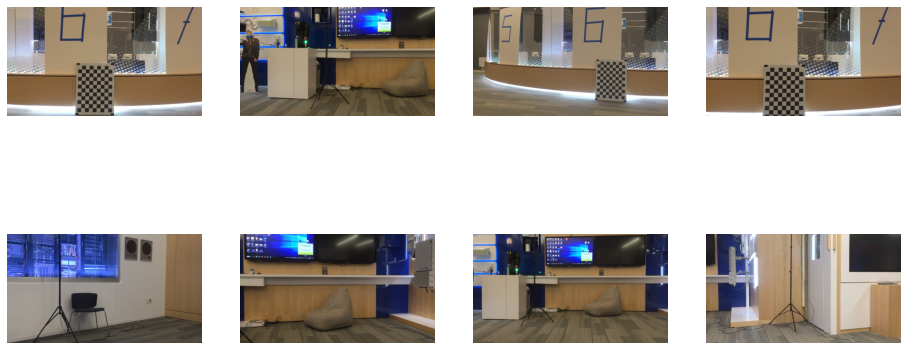

In [15]:
image_path = image_directory_parser(path_to_images_for_map, viewer=True, number = 4) 


In [16]:
path_to_json = Path('/home/Hierarchical-Localization/datasets/iPhoSil210228T2PoseData')

In [21]:
#JSS
## what format are the rotation is in?
## right now parsing it and keeping it 
import numpy as np
import json 
from pathlib import Path
root ='/home/Hierarchical-Localization/datasets/iPhoSil210228T2PoseData'# need to pass in as an argument 

image_dir = root+"/imageFileNamesValid.json"
translation_dir = root+"/tvecsU.json"
rotation_dir = root+"/rvecsU.json"

with open(image_dir) as f:
    image_names = json.load(f)
with open(translation_dir) as f:
    translation_values = json.load(f)
with open(rotation_dir) as f:
    rotation_values = json.load(f)


def parser(skip):
    names_trans_rot = {}
    j =0 
    root ='/home/Hierarchical-Localization/datasets/iPhoSil210228T2PoseData'# need to pass in as an argument 

    image_dir = root+"/imageFileNamesUseful.json"
    translation_dir = root+"/tvecsU.json"
    rotation_dir = root+"/rvecsU.json"
    current_skip = 0
    print(skip)
    from_useful = {}
#     skip = 3
    with open(image_dir) as f:
        image_names = json.load(f)
#         print(np.shape(image_names))
    with open(translation_dir) as f:
        translation_values = json.load(f)
#         print(np.shape(translation_values))
    with open(rotation_dir) as f:
        rotation_values = json.load(f)
#         print(np.shape(rotation_values))
    
    for i in tqdm(range(len(image_names))):
        name = (image_names[i]).split("/")[7]
#         print(np.shape(translation_values[0]))
#         print(np.shape(translation_values[1]))
        
#         print(np.shape(translation_values[2]))
        

        tvec = [translation_values[0][j], translation_values[1][j], translation_values[2][j]]
        rvec = [rotation_values[0][j], rotation_values[1][j],rotation_values[2][j]]
        names_trans_rot[name]= {"tvec":tvec, "rvec":rvec}
        j = j+1
        if current_skip<skip:
            current_skip+=1
            continue
        current_skip = 0
        from_useful[name]= {"tvecs": tvec, "rvecs": rvec}
            
    print(len(names_trans_rot))
    return names_trans_rot, from_useful

In [22]:
## this code is just used to create the folders 

def dictionary_of_images(image_path, using, path_to_images_for_map, folder_name):
    list_of_image = list(using.keys())
    image_dict ={}
    to_save = (path_to_images_for_map.parent)/folder_name
    to_save.mkdir()
    index = 0
    for i,j in tqdm(enumerate(image_path)):
        if str(j.name) in list_of_image:
            image_array = cv2.imread(str(j))
    #         print(image_path[i].name)
            image_to_save = to_save/j.name
            copyfile(j,image_to_save)
            image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
            image_dict[index] = {"image":image_array, "name": image_path[i].name, "number": index}
            index+=1
    return image_dict

In [25]:
_, from_useful_skip3 = parser(3)
print(len(from_useful_skip3))

100%|██████████| 5166/5166 [00:00<00:00, 332695.22it/s]

3
5166
1291


In [26]:
_, from_useful_skip4 = parser(4)
print(len(from_useful_skip4))

100%|██████████| 5166/5166 [00:00<00:00, 337588.41it/s]

4
5166
1033


In [ ]:
#change the folder name to skip3
_ = dictionary_of_images(image_path, from_useful_skip3, path_to_images_for_map, 'skip_n_3')
#change the folder name to skip4
_ = dictionary_of_images(image_path, from_useful_skip4, path_to_images_for_map, 'skip_n1_4')
    

In [19]:
#change the folder name to skip4
_ = dictionary_of_images(image_path, from_useful_skip4, path_to_images_for_map, 'skip_np_4')

5166it [00:15, 327.89it/s]


In [20]:
len(from_useful_skip4)

1291